In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


## Week 3 Take-Home Problems
1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [ ]:
# Wouldn't a bar chart be a better representation for showing how many pedestrians total for each day in the week?

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_name'] = df['hour_beginning'].dt.day_name()
weekdays = df.loc[~df['day_name'].isin(['Saturday', 'Sunday'])]
ped_by_day = weekdays.groupby('day_name')['Pedestrians'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)
ped_by_day

day_name
Monday       1481435
Tuesday      1394963
Wednesday    1310900
Thursday     1370880
Friday       1588068
Name: Pedestrians, dtype: int64

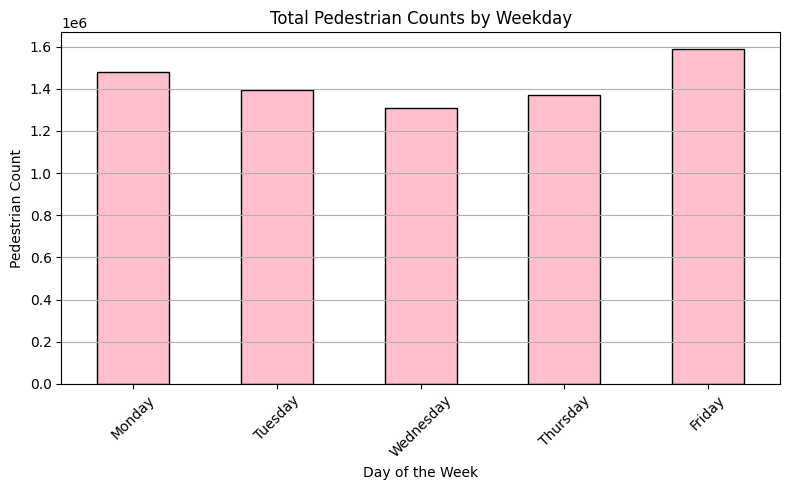

In [ ]:
plt.figure(figsize=(8, 5))
ped_by_day.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Total Pedestrian Counts by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

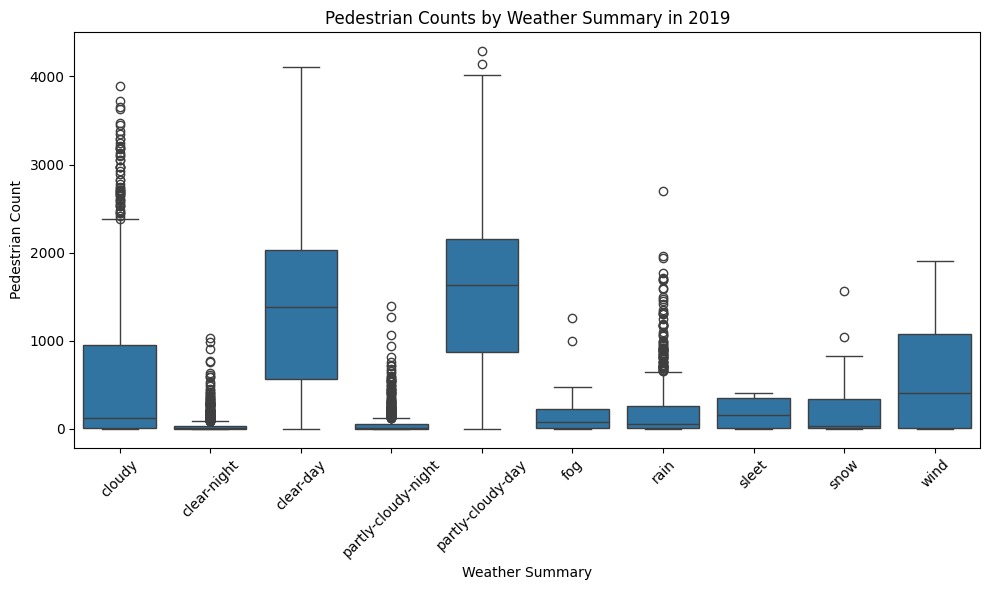

In [26]:
# Correlation matrices are only for looking at relationships between numerical data. Using a box plot like in the lesson notebook, or even a bar graph is more appropriate.

df['weather_summary'] = df['weather_summary'].ffill()
df['weather_summary'] = df['weather_summary'].bfill()
df['Year'] = df['hour_beginning'].dt.year
df_2019 = df.loc[df['Year'] == 2019]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2019, x='weather_summary', y='Pedestrians')
plt.title('Pedestrian Counts by Weather Summary in 2019')
plt.xlabel('Weather Summary')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

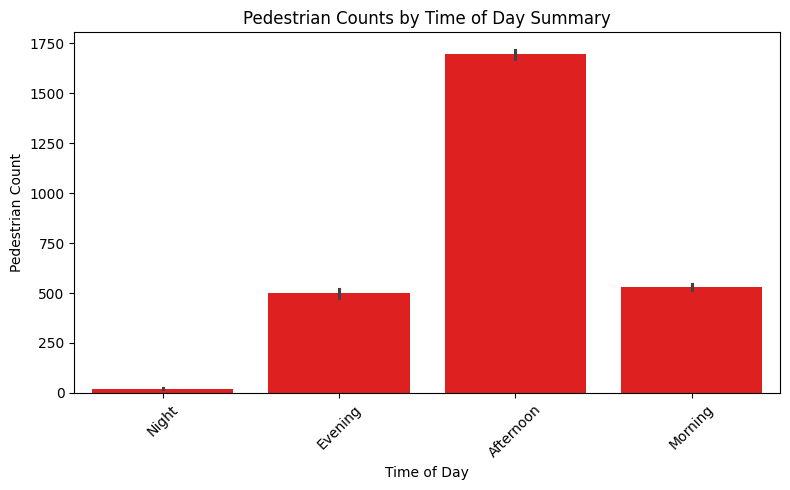

In [30]:
df['Hour'] = df['hour_beginning'].dt.hour
'''
Morning (5 - 11)
Afternoon (12 - 17)
Evening (18 - 22)
Night (23 - 4)
'''

def get_Time_of_Day(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 22:
        return 'Evening'
    else: return 'Night'

df['Time of Day'] = df['Hour'].apply(get_Time_of_Day)

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Time of Day', y='Pedestrians', color='red')
plt.title('Pedestrian Counts by Time of Day Summary')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
